**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [3]:
import sympy as sp

# Define the symbols
C, L, w, tau, alpha, nu, kappa, G = sp.symbols('C L w tau alpha nu kappa G')

# Define tilde{w}
tilde_w = (1 - tau) * w

# Define the utility function
V = sp.log(C**alpha * G**(1 - alpha)) - nu*L**2 / 2

# Substitute the constraint into the utility function
V_sub = V.subs(C, kappa + tilde_w * L)

# Take the derivative of the utility function
V_prime = sp.diff(V_sub, L)

# Solve for L where the derivative equals zero
solution = sp.solve(V_prime, L)

# Print the solution
print("The solution is ", solution)


The solution is  [(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1)), (kappa*nu + sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))]


Using sympy, we optimize the labor supply in the exam.py file.

Sympy has returned two solutions because the equation we are solving is quadratic. Unfortunately, SYMPY has done derrivations beyond the given solution. The two solutions are:
$\frac{\kappa\nu - \sqrt{\nu(4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2 + \kappa^2\nu)}}{2\nu w (\tau - 1)}$
and
$\frac{\kappa\nu + \sqrt{\nu(4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2 + \kappa^2\nu)}}{2\nu w (\tau - 1)}$

We will now simplify to reach the desired outcome:
The numerator in the square root is the term that needs simplifying. Let's write it in a more compact form and simplify it:

$4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2$

Factor out $4\alpha w^2$:

$4\alpha w^2 (\tau^2 - 2\tau + 1)$

$(\tau^2 - 2\tau + 1)$=$(\tau - 1)^2$. Therefore:

$4\alpha w^2 (\tau - 1)^2$

Remember that we defined $\tilde{w} = (1 - \tau)w$, so this can be simplified further to:
$4\alpha\tilde{w}^2$
Substituting this back into the solutions, we get:

$\frac{-\kappa + \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ and

$\frac{-\kappa - \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$
The second solution is not valid in this context because labor cannot be negative. Therefore, the valid solution is the first one and we have verified the optimal $L^{\star}(\tilde{w})$.

We see that G is not included in the optimal L*, and as such this is the solution for both $G\in\left\{1.0 , 2.0\right\}$.


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

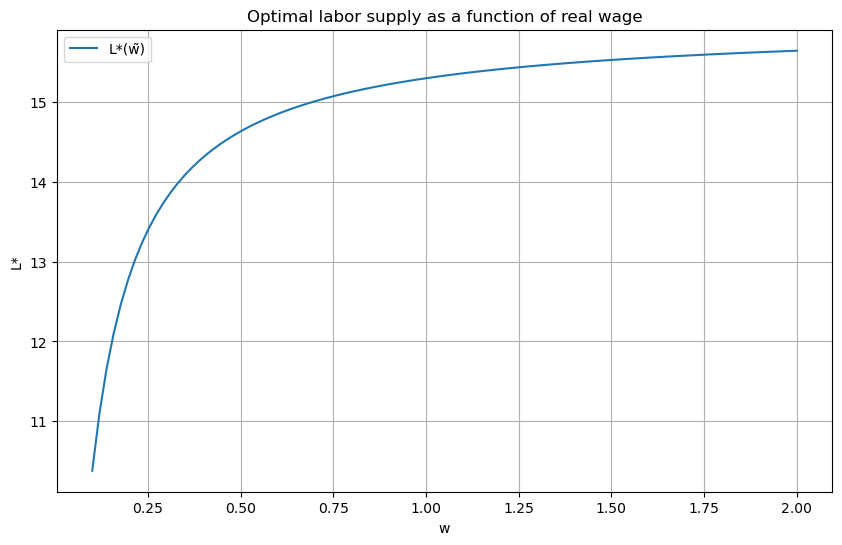

In [4]:
import numpy as np
import matplotlib.pyplot as plt



# define the parameter values
alpha = 0.5
nu = 1/(2 * 16**2)
kappa = 1
tau = 0.3

# define a function for optimal labor supply
def L_star(w, tau, kappa, alpha, nu):
    w_tilde = (1 - tau)*w
    return (-kappa + np.sqrt(kappa**2 + 4*(alpha/nu)*w_tilde**2)) / (2*w_tilde)

# create an array of w values
w_values = np.linspace(0.1, 2, 100)  # we start from 0.1 to avoid dividing by zero in L_star

# compute L* for each w
L_values = L_star(w_values, tau, kappa, alpha, nu)

# plot L* as a function of w
plt.figure(figsize=(10, 6))
plt.plot(w_values, L_values, label='L*(w̃)')
plt.xlabel('w')
plt.ylabel('L*')
plt.title('Optimal labor supply as a function of real wage')
plt.legend()
plt.grid(True)
plt.show()


We see that the optimal labour supply increases when the wage increases up to a cetain point around 16 hours. This can be explained by the tax rate being 30%, thus above a certain threshold the extra effort of working is not met by an equal compensation of consumption, especially given that the marginal utility rate of government consumption and consumption is decreasing in scale.

In the figure aswell we can see that at even very low level of employment the labour supply is still quite high at around 11 hours. This can be explained by the cost of labour being very low, being weightet by $v/2$, which is a very small number. In a model containing utlity of free time the optimal labour supply curve would be quite different. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


Here we use numpy and matplotlib.plyplot to first calculate the grid og L and G parameters and storing them afterwards 

C:\Users\andre\AppData\Local\Temp\ipykernel_44228\937665870.py:22: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * G**(1 - alpha)) - nu * L_star**2 / 2
C:\Users\andre\AppData\Local\Temp\ipykernel_44228\937665870.py:20: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


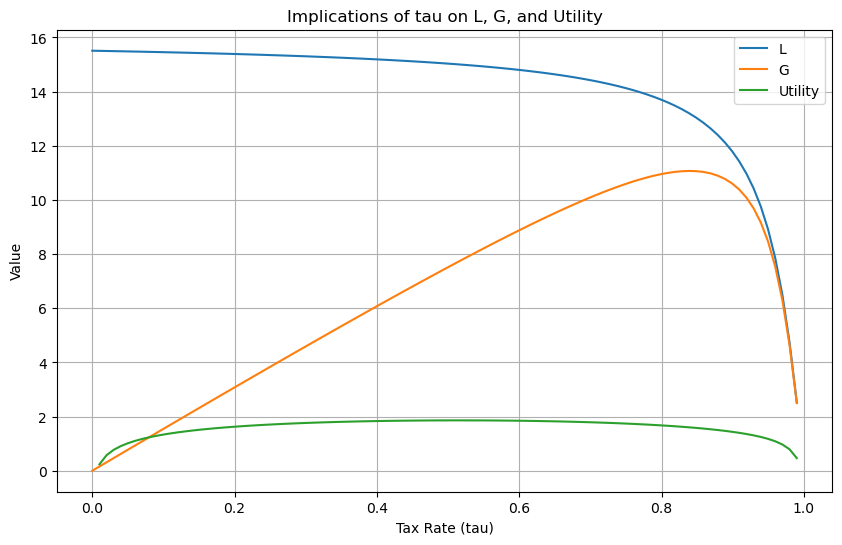

In [5]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt

# Define the variables and parameters
w = 1.0
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
tau_values = np.linspace(0, 1, 100)  # Grid of tau values

# Initialize arrays to store results
L_values = []
G_values = []
utility_values = []

# Calculate implied L, G, and utility for each tau value
for tau in tau_values:
    tilde_w = (1 - tau) * w
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)
    G = tau * w * L_star
    utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * G**(1 - alpha)) - nu * L_star**2 / 2

    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tau_values, L_values, label='L')
plt.plot(tau_values, G_values, label='G')
plt.plot(tau_values, utility_values, label='Utility')
plt.xlabel('Tax Rate (tau)')
plt.ylabel('Value')
plt.title('Implications of tau on L, G, and Utility')
plt.legend()
plt.grid(True)
plt.show()

This figure displays a more detailed version of the laffer curve, showing that even given that government consumption gives utility, above a certain rate of taxation the labour supply decreases and thus the government consumption itself increases when the marginal taxation gets too high. In this graph we can also see that the maximum utility seems to be between 40 and 50%, which can be explained by alpha being 0,5 meaning the marginal utility of government consumption is equal to the marginal utility of consumption and thus the allocations should optimally be more or less equal given differences in other variables.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

Here we use numpy to numerically optimize tax rates, we calculate different utilities for different tax rates and stores them to display in the figure below.

Optimal tax rate (tau_star): 0.5145311264139927
Maximized worker utility: 1.8591992509323028


C:\Users\andre\AppData\Local\Temp\ipykernel_44228\2023066052.py:16: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * (tau * w * L_star)**(1 - alpha)) - nu * L_star**2 / 2
C:\Users\andre\AppData\Local\Temp\ipykernel_44228\2023066052.py:15: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


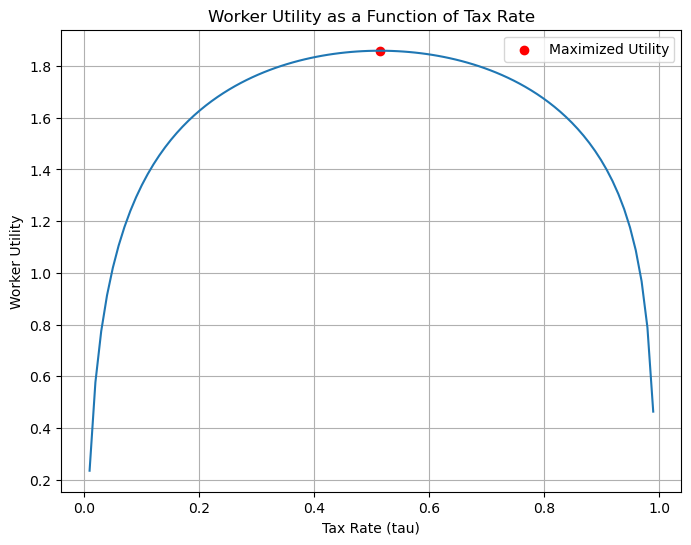

In [6]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the variables and parameters
w = 1.0
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)

# Define the worker utility function
def worker_utility(tau):
    tilde_w = (1 - tau) * w
    L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)
    utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * (tau * w * L_star)**(1 - alpha)) - nu * L_star**2 / 2
    return -utility  # Negative sign for maximization

# Perform numerical optimization to find the optimal tau
result = minimize(worker_utility, x0=0.5, bounds=[(0, 1)])

tau_star = result.x[0]
utility_star = -result.fun

print("Optimal tax rate (tau_star):", tau_star)
print("Maximized worker utility:", utility_star)

# Plot the worker utility function
tau_values = np.linspace(0, 1, 100)
utility_values = [-worker_utility(tau) for tau in tau_values]

plt.figure(figsize=(8, 6))
plt.plot(tau_values, utility_values)
plt.scatter(tau_star, utility_star, color='red', label='Maximized Utility')
plt.xlabel('Tax Rate (tau)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility as a Function of Tax Rate')
plt.legend()
plt.grid(True)
plt.show()

This graph expands on the utlity graph from question 3, we see that above a set level of taxation (calculated to 51%) an increase in the tax rate actually decreases the government consumption, as the labour supply is negatively adjusted. In economic theory this graph is known as the Laffer curve, however its empirical validation is not as clear.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using $\tau$=0,54 based on this.*

In [7]:
import numpy as np
from scipy.optimize import minimize

# Parameters
sigma = 1.0001
rho = 1.0001
epsilon = 1.0
alpha = 0.5
nu = 1/(2 * 16**2)
kappa = 1
tau = 0.54
w = 1  # Assuming wage rate to be 1

# Utility function
def utility(L, w, tau, G):
    C = kappa + (1 - tau)*w*L
    term1 = (alpha*C**((sigma - 1)/sigma) + (1 - alpha)*G**((sigma - 1)/sigma))**(sigma/(sigma - 1))
    term2 = nu*L**(1 + epsilon) / (1 + epsilon)
    return -((term1**(1 - rho) - 1) / (1 - rho) - term2)

# First, solve for L
def solve_for_L(w, tau, G):
    L0 = 0.5  # Initial guess for L
    result = minimize(utility, L0, args=(w, tau, G), bounds=[(0, 24)])
    return result.x[0]

# Then, solve for G
def solve_for_G(tau, w):
    G0 = 0.5  # Initial guess for G
    result = minimize(lambda G: (G - tau*w*solve_for_L((1 - tau)*w, tau, G))**2, G0, bounds=[(0, None)])
    return result.x[0]

# Solve the worker problem
G_star = solve_for_G(tau, w)
L_star = solve_for_L((1 - tau)*w, tau, G_star)

print(f"Optimal labor supply (L*): {L_star}")
print(f"Optimal public goods level (G*): {G_star}")



C:\Users\andre\AppData\Local\Temp\ipykernel_44228\3431970061.py:19: RuntimeWarning: divide by zero encountered in power
  return -((term1**(1 - rho) - 1) / (1 - rho) - term2)
c:\Users\andre\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimal labor supply (L*): 13.797030672453795
Optimal public goods level (G*): 0.4999999152943417


In [8]:
#q6
# Then, solve for tau
def solve_for_tau(w):
    tau0 = 0.5  # Initial guess for tau
    result = minimize(lambda tau: -utility(solve_for_L((1 - tau)*w, tau, solve_for_G(tau, w)), (1 - tau)*w, tau, solve_for_G(tau, w)), tau0, bounds=[(0, 1)])
    return result.x[0]

# Solve the problem
tau_star = solve_for_tau(w)
G_star = solve_for_G(tau_star, w)
L_star = solve_for_L((1 - tau_star)*w, tau_star, G_star)

print(f"Socially optimal tax rate (tau*): {tau_star}")
print(f"Optimal labor supply with socially optimal tax rate (L*): {L_star}")
print(f"Optimal public goods level with socially optimal tax rate (G*): {G_star}")

C:\Users\andre\AppData\Local\Temp\ipykernel_44228\3431970061.py:19: RuntimeWarning: divide by zero encountered in power
  return -((term1**(1 - rho) - 1) / (1 - rho) - term2)


Socially optimal tax rate (tau*): 0.9999999999956197
Optimal labor supply with socially optimal tax rate (L*): 0.0005943486686080802
Optimal public goods level with socially optimal tax rate (G*): 0.0005943657528444067


In [9]:
import numpy as np
from scipy.optimize import minimize

# Parameters
sigma = 1.5
rho = 1.5
epsilon = 1.0
alpha = 0.5
nu = 1/(2 * 16**2)
kappa = 1
tau = 0.54
w = 1  # Assuming wage rate to be 1

# Utility function
def utility(L, w, tau, G):
    C = kappa + (1 - tau)*w*L
    term1 = (alpha*C**((sigma - 1)/sigma) + (1 - alpha)*G**((sigma - 1)/sigma))**(sigma/(sigma - 1))
    term2 = nu*L**(1 + epsilon) / (1 + epsilon)
    return -((term1**(1 - rho) - 1) / (1 - rho) - term2)

# First, solve for L
def solve_for_L(w, tau, G):
    L0 = 0.5  # Initial guess for L
    result = minimize(utility, L0, args=(w, tau, G), bounds=[(0, 24)])
    return result.x[0]

# Then, solve for G
def solve_for_G(tau, w):
    G0 = 0.5  # Initial guess for G
    result = minimize(lambda G: (G - tau*w*solve_for_L((1 - tau)*w, tau, G))**2, G0, bounds=[(0, None)])
    return result.x[0]

# Solve the worker problem
G_star = solve_for_G(tau, w)
L_star = solve_for_L((1 - tau)*w, tau, G_star)

print(f"Optimal labor supply (L*): {L_star}")
print(f"Optimal public goods level (G*): {G_star}")


Optimal labor supply (L*): 11.632564571968045
Optimal public goods level (G*): 1.4999994102472225


In [10]:
#q6
# Then, solve for tau
def solve_for_tau(w):
    tau0 = 0.5  # Initial guess for tau
    result = minimize(lambda tau: -utility(solve_for_L((1 - tau)*w, tau, solve_for_G(tau, w)), (1 - tau)*w, tau, solve_for_G(tau, w)), tau0, bounds=[(0, 1)])
    return result.x[0]

# Solve the problem
tau_star = solve_for_tau(w)
G_star = solve_for_G(tau_star, w)
L_star = solve_for_L((1 - tau_star)*w, tau_star, G_star)

print(f"Socially optimal tax rate (tau*): {tau_star}")
print(f"Optimal labor supply with socially optimal tax rate (L*): {L_star}")
print(f"Optimal public goods level with socially optimal tax rate (G*): {G_star}")

Socially optimal tax rate (tau*): 0.5000013491643988
Optimal labor supply with socially optimal tax rate (L*): 14.107360834850738
Optimal public goods level with socially optimal tax rate (G*): 0.5


In [11]:
import numpy as np
from scipy.optimize import minimize

# Parameters
sigma = 1.5
rho = 1.5
epsilon = 1.0
alpha = 0.5
nu = 1/(2 * 16**2)
kappa = 1
w = 1  # Assuming wage rate to be 1

# Utility function
def utility(L, w, tau, G):
    C = kappa + (1 - tau)*w*L
    term1 = (alpha*C**((sigma - 1)/sigma) + (1 - alpha)*G**((sigma - 1)/sigma))**(sigma/(sigma - 1))
    term2 = nu*L**(1 + epsilon) / (1 + epsilon)
    return -((term1**(1 - rho) - 1) / (1 - rho) - term2)

# First, solve for L
def solve_for_L(w, tau, G):
    L0 = 0.5  # Initial guess for L
    result = minimize(utility, L0, args=(w, tau, G), bounds=[(0, 24)])
    return result.x[0]

# Then, solve for G
def solve_for_G(tau, w):
    G0 = 0.5  # Initial guess for G
    result = minimize(lambda G: (G - tau*w*solve_for_L((1 - tau)*w, tau, G))**2, G0, bounds=[(0, None)])
    return result.x[0]

# Then, solve for tau
def solve_for_tau(w):
    tau0 = 0.5  # Initial guess for tau
    result = minimize(lambda tau: -utility(solve_for_L((1 - tau)*w, tau, solve_for_G(tau, w)), (1 - tau)*w, tau, solve_for_G(tau, w)), tau0, bounds=[(0, 1)])
    return result.x[0]

# Solve the worker problem
G_star = solve_for_G(tau_star, w)
L_star = solve_for_L((1 - tau_star)*w, tau_star, G_star)

# Solve the socially optimal tax rate problem
tau_star = solve_for_tau(w)
G_star = solve_for_G(tau_star, w)
L_star = solve_for_L((1 - tau_star)*w, tau_star, G_star)

print(f"Optimal labor supply (L*): {L_star}")
print(f"Optimal public goods level (G*): {G_star}")
print(f"Socially optimal tax rate (tau*): {tau_star}")
print(f"Optimal labor supply with socially optimal tax rate (L*): {L_star}")
print(f"Optimal public goods level with socially optimal tax rate (G*): {G_star}")


Optimal labor supply (L*): 14.107360834850738
Optimal public goods level (G*): 0.5
Socially optimal tax rate (tau*): 0.5000013491643988
Optimal labor supply with socially optimal tax rate (L*): 14.107360834850738
Optimal public goods level with socially optimal tax rate (G*): 0.5


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

Se i opg 5.

In this paper we have combined the questions 5 and 6 into one calculation to make it more clear, we first use numpy to calculate the optimal labour rate and afterwards optimize for G and $\tau$, we do this for both sets of $\sigma$ and tho parameters

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [12]:
import sympy as sp

# Define the variables
ell_t, kappa_t, eta, w = sp.symbols('ell_t kappa_t eta w')

# Define the profit function
Pi_t = kappa_t * ell_t**(1 - eta) - w * ell_t

# Differentiate the profit function with respect to ell_t
dPi_dell_t = sp.Eq(0,sp.diff(Pi_t, ell_t))
dPi_dell_t

Eq(0, -w + ell_t**(1 - eta)*kappa_t*(1 - eta)/ell_t)

In [13]:
# Solve the derivative equation for ell_t
optimal_ell_t = sp.solve(dPi_dell_t, ell_t)
# Simplify the equation
simplified_eq = sp.Eq(ell_t,(sp.simplify(optimal_ell_t[0])))
simplified_eq

Eq(ell_t, (kappa_t*(1 - eta)/w)**(1/eta))

To confirm that this indeed is the optimal equation for labour for both $\kappa=1$ and $\kappa=2$ we maximize profits for both function to see if we find the same optimal employment.

In [14]:
# Define the profit function
profit = kappa_t * ell_t**(1 - eta) - w * ell_t

# Set the baseline parameters
eta_value = 0.5
w_value = 1.0

# Calculate the profit for different values of ell_t and verify the maximum
kappa_values = [1.0, 2.0]
for kappa in kappa_values:
    # Calculate the ell_t that maximizes the profit
    ell_optimal = sp.solve(sp.diff(profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value)]), ell_t), ell_t)[0]
    # Calculate the maximum profit
    profit_max = profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value), (ell_t, ell_optimal)])
    
    # Ensure ell_optimal is a whole number
    ell_optimal = sp.ceiling(ell_optimal)
    
    # Print the results
    print(f'For kappa = {kappa}:')
    print(f'The optimal number of hairdressers (ell_t) is: {ell_optimal.evalf()}')
    print(f'The maximum profit is: {profit_max.evalf()}\n')

For kappa = 1.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 0.250000000000000

For kappa = 2.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 1.00000000000000



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [15]:
import numpy as np

# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5  
w = 1  
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.
# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l[0] = ((1-eta)*kappa[0]/w)**(1/eta)  # initial l
    
    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l[t] = ((1-eta)*kappa[t]/w)**(1/eta)
    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H = np.mean(h_values)
print(H)

27.693592041332398


We have chosen to run 10.000 simulations to get an aproximate result, we find a expected value of the hairdressers bussiness to be 27,69 ofc given small changes caused by the random shocks. To reproduce we have seeded our simulation.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [16]:
import numpy as np

# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.

# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        # Update l[t] based on the policy
        if np.abs(l[t-1] - l_star) > 0.05:
            l[t] = l_star
        else:
            l[t] = l[t-1]

    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H_new_policy = np.mean(h_values)

# Compare with the previous policy
profitability_improvement = H_new_policy - H


In [17]:
print(H_new_policy)
print(profitability_improvement)

28.411887191796524
0.718295150464126


We find a slight yet significant improvement in profitability caused by the new policy. This can be explained by that by not adjusting employment under small productivity shocks, the company does not have to face frequent adjustments costs. 

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

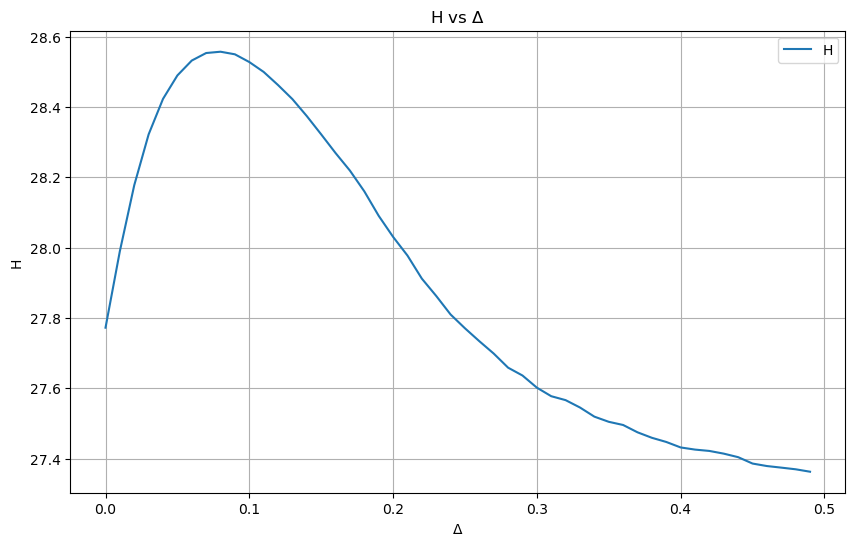

The optimal Delta that maximizes H is 0.08


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of Delta values to test
Delta_values = np.arange(0, 0.51, 0.01)
H_values = np.zeros(len(Delta_values))

for i, Delta in enumerate(Delta_values):
    h_values = np.zeros(K)
    for k in range(K):
        # Initialize kappa and l
        kappa = np.zeros(T)
        kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
        l = np.zeros(T)
        l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
        l[0] = l_star_initial  # initial l

        # Calculate l_t and kappa_t for t = 1, ..., T-1
        for t in range(1, T):
            kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
            l_star = ((1-eta)*kappa[t]/w)**(1/eta)
            # Update l[t] based on the policy
            if np.abs(l[t-1] - l_star) > Delta:
                l[t] = l_star
            else:
                l[t] = l[t-1]

        # Calculate h for this shock series
        adjustment_cost = iota * np.sum(l[1:] != l[:-1])
        profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
        h_values[k] = profit

    # The ex-ante expected value H is the average of these values
    H_values[i] = np.mean(h_values)

# Plot H against Delta
plt.figure(figsize=(10, 6))
plt.plot(Delta_values, H_values, label='H')
plt.xlabel(r'$\Delta$')
plt.ylabel('H')
plt.title('H vs $\Delta$')
plt.legend()
plt.grid(True)
plt.show()

# Find the Delta value that maximizes H
optimal_Delta = Delta_values[np.argmax(H_values)]
print(f'The optimal Delta that maximizes H is {optimal_Delta}')


This code is quite slow to run, however to effectively calculate and save the deltas over several simulations we have not found an effective way to optimize it while still answering the question. We now calculate the profits using this new rule

In [19]:
import numpy as np

# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.

# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        # Update l[t] based on the policy
        if np.abs(l[t-1] - l_star) > 0.08:
            l[t] = l_star
        else:
            l[t] = l[t-1]

    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H_opt_policy = np.mean(h_values)
H_opt_policy

28.47623127025638


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We aim to improve profitability by taking into account the past 5 time periods, instead of just the previous one. The thought is that the model would be less sensitive to a recent erratic change/shock that may be uncharacteristic of the market. This would avoid making changes based on a possible short-term demand-shock.

In [20]:
import statistics

# Define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # The number of periods
K = 10000  # The number of shock series for Monte Carlo approximation.

# Initialize the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

data = (l[t-1],l[t-2],l[t-3],l[t-4],l[t-5])
t5 = np.mean(data)

# Loop over the shock series
for k in range(K):
    # Initialize kappa and l
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Calculate l_t and kappa_t for t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        # Update l[t] based on the policy
        if np.abs(t5 - l_star) > 0.05:
            l[t] = l_star
        else:
            l[t] = t5

    
    # Calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# The ex-ante expected value H is the average of these values
H_own_policy = np.mean(h_values)

# Compare with the previous policy
profitability_improvement = H_own_policy - H

In [21]:
print(H_own_policy)
print(profitability_improvement)

27.978862052307864
0.28527001097546645


In [22]:
from tabulate import tabulate

# Define your results as a list of lists or a list of tuples
results = [
    ["Delta= 0", H],
    ["Delta=0.05", H_new_policy],
    ["Delta=0.08", H_opt_policy],
    ["Delta over 5 t", H_own_policy]
]

# Define the headers for your table
headers = ["Simulation", "Expected value", ]

# Use the tabulate function to format the table
table = tabulate(results, headers, tablefmt="fancy_grid")

# Print the table
print(table)

╒════════════════╤══════════════════╕
│ Simulation     │   Expected value │
╞════════════════╪══════════════════╡
│ Delta= 0       │          27.6936 │
├────────────────┼──────────────────┤
│ Delta=0.05     │          28.4119 │
├────────────────┼──────────────────┤
│ Delta=0.08     │          28.4762 │
├────────────────┼──────────────────┤
│ Delta over 5 t │          27.9789 │
╘════════════════╧══════════════════╛


We find that by calculating delta over 5 periods to sort out smaller shocks, the expected value of the company is higher than allways adjusting however its lower than using the policy of delta=0.5 as we might adjust too little with this new policy. As we see in figure 4 the optimal policy for delta is 0.08 which also has a higher evaluation than adjusting to shocks over 5 periods. 

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [23]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

NameError: name 'iterations' is not defined

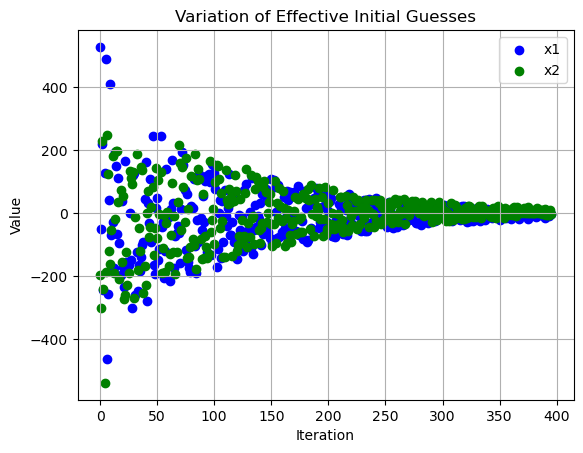

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K = 1000

# Run refined global optimizer
x_star, x0_values = refined_global_optimizer(bounds, tau, K_warmup, K, 'BFGS')

# Extract x1 and x2 values from the effective initial guesses
x0_values = np.array(x0_values)
x1_values = x0_values[:, 0]
x2_values = x0_values[:, 1]

# Plotting the variation of effective initial guesses with iteration counter
plt.scatter(range(len(x1_values)), x1_values, c='blue', label='x1')
plt.scatter(range(len(x2_values)), x2_values, c='green', label='x2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Variation of Effective Initial Guesses')
plt.legend()
plt.grid(True)

# Display the number of iterations
plt.text(0.5, 0.9, f'Iterations: {iterations}', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

plt.show()


The Grievwank function is a function with an abundant amount of local maxima and minima making it an optimal function to test seaching algoritith to see if they identify the correct maximum point. In this scenario the true minima which our algorithm seaches for is 0, and as we can see in figure XX after around 350 iterations we aproximate the actual minimum of 0. 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

By increasing the number of warmup iterations we increase the number of times the algortithm runs before adjusting for each initial guess, thus giving us a tradeoff in algoriithm effectiveness by "sacrifizing" more unadjusted guesses to train to the algorithm to be more effective in the guesses afterwards. To test this we run the algorithm a 100 times and calculate the average number of iterations needed for each algorithm before hitting the 0 point to better compare the effectiveness.

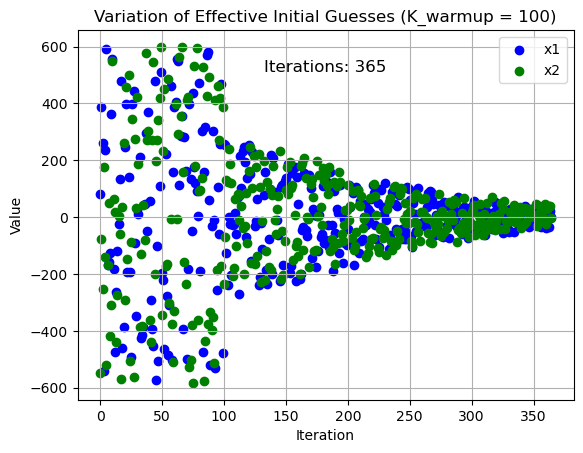

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values, k+1

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K = 1000

# Run refined global optimizer
x_star, x0_values, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, 'BFGS')

# Extract x1 and x2 values from the effective initial guesses
x0_values = np.array(x0_values)
x1_values = x0_values[:, 0]
x2_values = x0_values[:, 1]

# Plotting the variation of effective initial guesses with iteration counter
plt.scatter(range(len(x1_values)), x1_values, c='blue', label='x1')
plt.scatter(range(len(x2_values)), x2_values, c='green', label='x2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f'Variation of Effective Initial Guesses (K_warmup = {K_warmup})')
plt.legend()
plt.grid(True)

# Display the number of iterations
plt.text(0.5, 0.9, f'Iterations: {iterations}', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values, k+1

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K = 1000
optimizer = 'BFGS'
num_runs = 100

# Initialize list to store the number of iterations
iterations_list = []

# Run the algorithm multiple times
for _ in range(num_runs):
    _, _, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
    iterations_list.append(iterations)

# Calculate the average number of iterations
avg_iterations = np.mean(iterations_list)

# Print the average number of iterations
print(f"Average number of iterations: {avg_iterations}")

Average number of iterations: 404.76


We now compare the average number needed to the previous algorithm with 10 warmup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []

    for k in range(K):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k
        
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x
        
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star
        
        x0_values.append(x_k0)

        if objective_function(x_star) < tau:
            break
    
    return x_star, x0_values, k+1

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K = 1000
optimizer = 'BFGS'
num_runs = 100

# Initialize list to store the number of iterations
iterations_list = []

# Run the algorithm multiple times
for _ in range(num_runs):
    _, _, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
    iterations_list.append(iterations)

# Calculate the average number of iterations
avg_iterations = np.mean(iterations_list)

# Print the average number of iterations
print(f"Average number of iterations: {avg_iterations}")

Average number of iterations: 312.74


By running each version of the "search" algo 100 times we compare the average number of iterations needed, ofc we can theoretically make a more precise comparison by increasing the number of runtime however this also increases the amount of time it takes for python to proccess. However, with 100 iterations we find that actually the version with a smaller amount of warmups is more effective at reaching the end point. However if do not include the warmups as actual guesses and subtract them, then the secound algorithm with the higher number of warmups is slightly faster.